In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
import scipy.stats as ss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("travel insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
Agency                  63326 non-null object
Agency Type             63326 non-null object
Distribution Channel    63326 non-null object
Product Name            63326 non-null object
Claim                   63326 non-null object
Duration                63326 non-null int64
Destination             63326 non-null object
Net Sales               63326 non-null float64
Commision (in value)    63326 non-null float64
Gender                  18219 non-null object
Age                     63326 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [4]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [5]:
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [6]:
df.fillna("Not Specified", inplace= True)

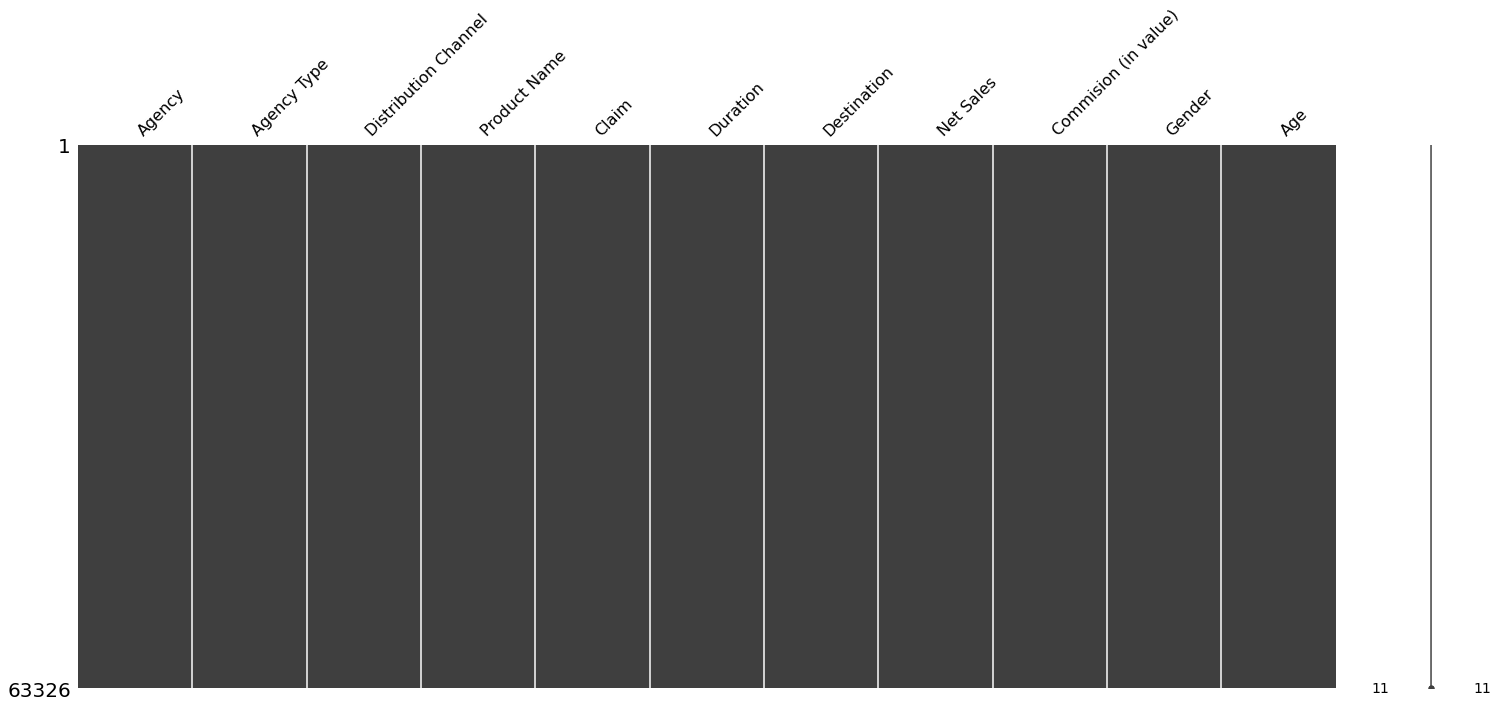

In [7]:
missingno.matrix(df)

In [8]:
df_numerical = df._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 4 columns):
Duration                63326 non-null int64
Net Sales               63326 non-null float64
Commision (in value)    63326 non-null float64
Age                     63326 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.9 MB


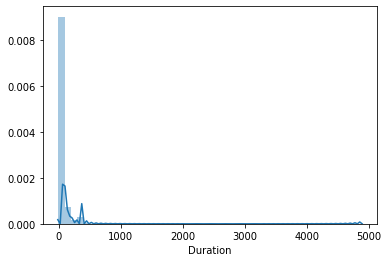

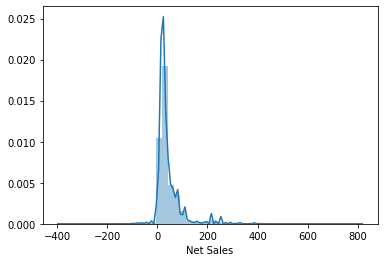

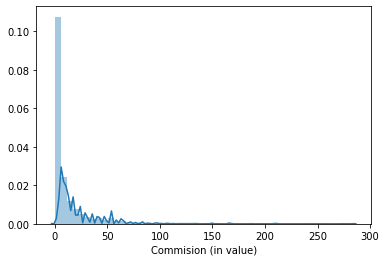

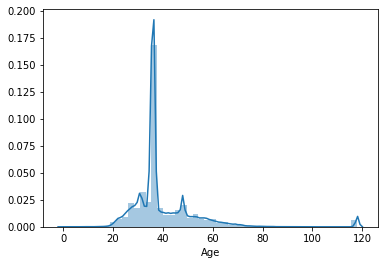

In [9]:
for i, col in enumerate(df_numerical):
    plt.figure(i)
    sns.distplot(df_numerical[col])

In [10]:
df['Duration'].describe()

count    63326.000000
mean        49.317074
std        101.791566
min         -2.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

In [11]:
df.loc[df['Duration'] < 0, 'Duration'] = df['Duration'].mean()

In [12]:
df['Duration'].describe()

count    63326.000000
mean        49.321062
std        101.790576
min          0.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

In [13]:
df2= df['Net Sales']<df['Commision (in value)']
df2.sum()

2014

In [14]:
df.loc[df['Net Sales'] == 0.0, 'Commision (in value)'] = 0

## Plot 

In [15]:
test=[(df[df['Gender']=='Not Specified']['Claim'].value_counts()/len(df[df['Gender']=='Not Specified']['Claim']))[1],(df[df['Gender']=='M']['Claim'].value_counts()/len(df[df['Gender']=='M']['Claim']))[1],
      (df[df['Gender']=='F']['Claim'].value_counts()/len(df[df['Gender']=='F']['Claim']))[1]]
test

[0.00638481832088146, 0.0313469562426447, 0.03899909828674482]

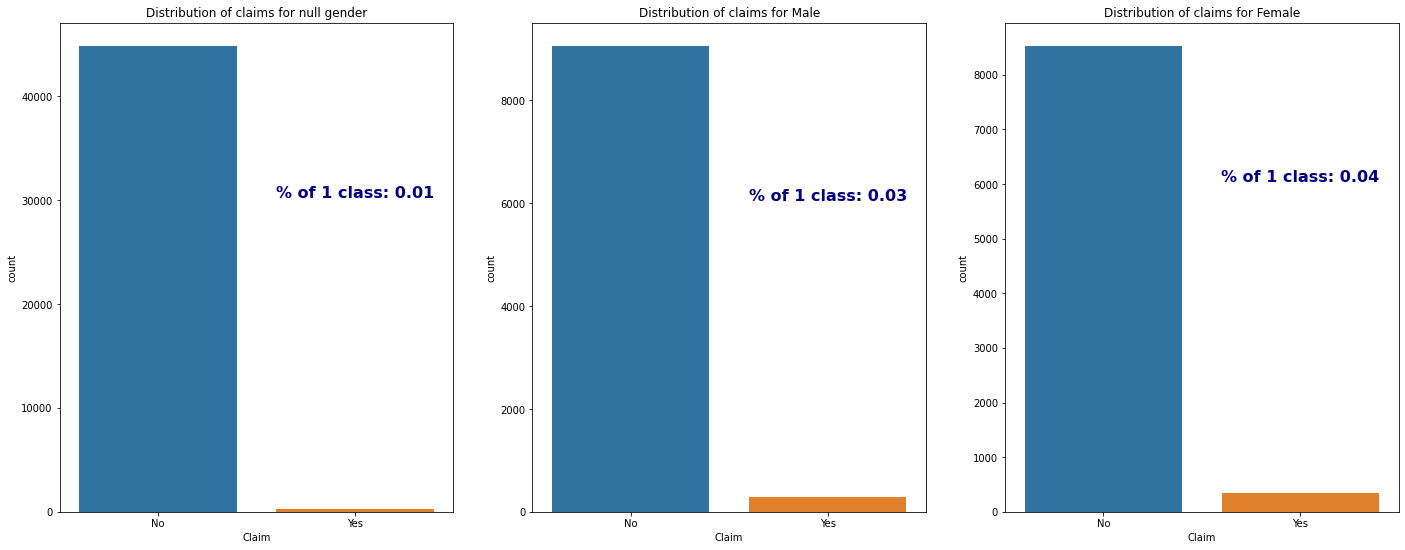

In [16]:
fig, axes=plt.subplots(1,3,figsize=(24,9))
sns.countplot(df[df['Gender']=='Not Specified']['Claim'],ax=axes[0])
axes[0].set(title='Distribution of claims for null gender')
axes[0].text(x=1,y=30000,s=f'% of 1 class: {round(test[0],2)}',fontsize=16,weight='bold',ha='center',va='bottom',color='navy')
sns.countplot(df[df['Gender']=='M']['Claim'],ax=axes[1])
axes[1].set(title='Distribution of claims for Male')
axes[1].text(x=1,y=6000,s=f'% of 1 class: {round(test[1],2)}',fontsize=16,weight='bold',ha='center',va='bottom',color='navy')
sns.countplot(df[df['Gender']=='F']['Claim'],ax=axes[2])
axes[2].set(title='Distribution of claims for Female')
axes[2].text(x=1,y=6000,s=f'% of 1 class: {round(test[2],2)}',fontsize=16,weight='bold',ha='center',va='bottom',color='navy')
plt.show()

In [17]:
df.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64

In [18]:
table1=pd.crosstab(df['Agency'],df['Claim'],margins=True)

table1.drop(index=['All'],inplace=True)
table1=(table1.div(table1['All'],axis=0))*100

table1['mean commision']=df.groupby('Agency')['Commision (in value)'].mean()
table1

Claim,No,Yes,All,mean commision
Agency,,,,
ADM,100.000000,0.000000,100.0,31.155366
ART,99.697885,0.302115,100.0,10.261752
C2B,93.383331,6.616669,100.0,20.094789
CBH,99.009901,0.990099,100.0,9.344554
CCR,98.453608,1.546392,100.0,10.116031
CSR,98.837209,1.162791,100.0,10.824767
CWT,98.997669,1.002331,100.0,28.928769
EPX,99.444745,0.555255,100.0,0.000000
JWT,99.465955,0.534045,100.0,21.553004


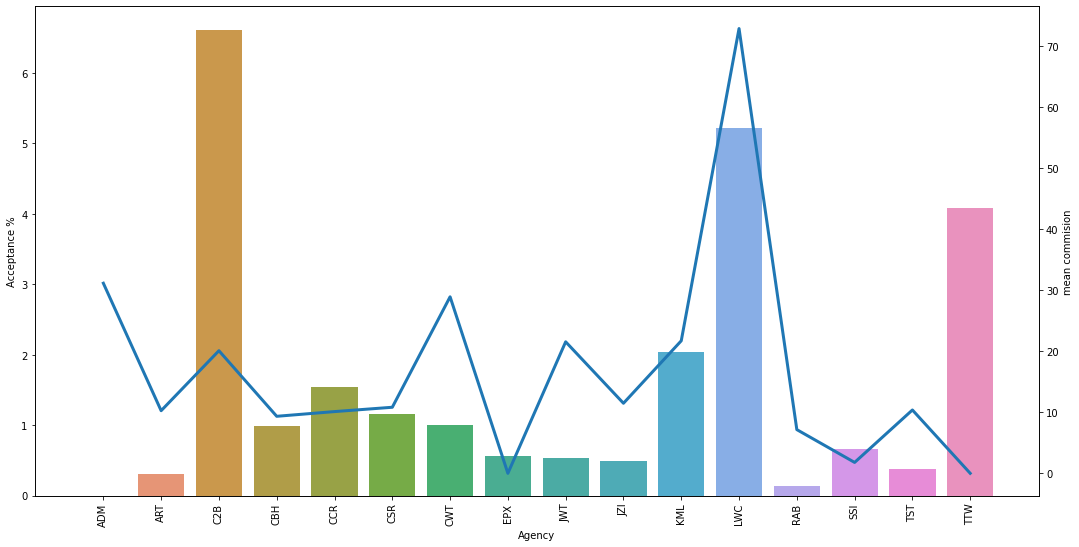

In [19]:
fig,ax1=plt.subplots(figsize=(18,9))
sns.barplot(table1.index,table1.Yes,ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel='Acceptance %')
ax2=ax1.twinx()
sns.lineplot(table1.index,table1['mean commision'],ax=ax2,linewidth=3)

In [20]:
table2=pd.crosstab(df['Product Name'],df['Claim'],margins=True)
table2=(table2.div(table2['All'],axis=0))*100

table2['mean commision']=df.groupby('Product Name')['Commision (in value)'].mean()
table2.drop(index=['All'],inplace=True)
table2

Claim,No,Yes,All,mean commision
Product Name,,,,
1 way Comprehensive Plan,99.729811,0.270189,100.0,0.000000
2 way Comprehensive Plan,98.920809,1.079191,100.0,0.000000
24 Protect,100.000000,0.000000,100.0,8.264939
Annual Gold Plan,89.175258,10.824742,100.0,84.892010
Annual Silver Plan,88.966971,11.033029,100.0,56.219487
Annual Travel Protect Gold,90.000000,10.000000,100.0,160.511200
Annual Travel Protect Platinum,94.339623,5.660377,100.0,215.935849
Annual Travel Protect Silver,95.348837,4.651163,100.0,130.387326
Basic Plan,99.579448,0.420552,100.0,9.359252


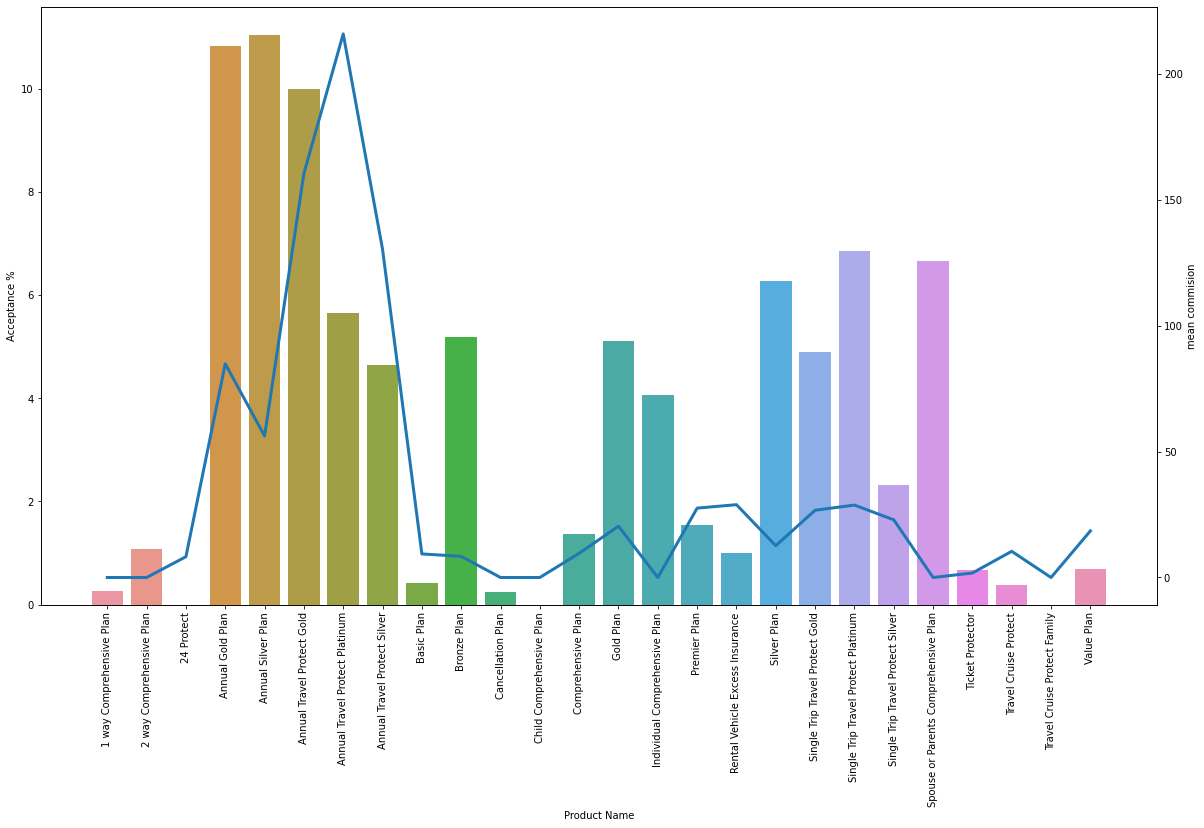

In [21]:
fig,ax1=plt.subplots(figsize=(20,11))
sns.barplot(table2.index,table2.Yes,ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel='Acceptance %')
ax2=ax1.twinx()
sns.lineplot(table2.index,table2['mean commision'],ax=ax2,linewidth=3)

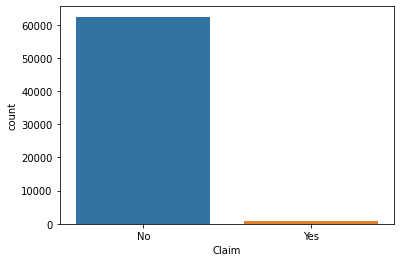

In [22]:
sns.countplot(df['Claim'])

In [23]:
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, df):
        self.df = df
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = ss.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)


In [24]:
X = df.drop(['Claim'], axis=1)
ct = ChiSquare(df)
for c in X.columns:
    ct.TestIndependence(c, 'Claim')

Agency is IMPORTANT for Prediction
Agency Type is IMPORTANT for Prediction
Distribution Channel is NOT an important predictor. (Discard Distribution Channel from model)
Product Name is IMPORTANT for Prediction
Duration is IMPORTANT for Prediction
Destination is IMPORTANT for Prediction
Net Sales is IMPORTANT for Prediction
Commision (in value) is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Age is IMPORTANT for Prediction


In [25]:
df.drop(columns=['Distribution Channel', 'Agency Type'], inplace=True, axis=1)

In [26]:
df.head()

,Agency,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Comprehensive Plan,No,186.0,MALAYSIA,-29.0,9.57,F,81
1,CBH,Comprehensive Plan,No,186.0,MALAYSIA,-29.0,9.57,F,71
2,CWT,Rental Vehicle Excess Insurance,No,65.0,AUSTRALIA,-49.5,29.70,Not Specified,32
3,CWT,Rental Vehicle Excess Insurance,No,60.0,AUSTRALIA,-39.6,23.76,Not Specified,32
4,CWT,Rental Vehicle Excess Insurance,No,79.0,ITALY,-19.8,11.88,Not Specified,41


In [27]:
Y = df['Claim']
X= df
X.drop(columns=['Claim'], axis=1, inplace=True)

In [28]:
print(Y.head())
print(X.head())

0    No
1    No
2    No
3    No
4    No
Name: Claim, dtype: object
  Agency                     Product Name  Duration Destination  Net Sales  \
0    CBH               Comprehensive Plan     186.0    MALAYSIA      -29.0   
1    CBH               Comprehensive Plan     186.0    MALAYSIA      -29.0   
2    CWT  Rental Vehicle Excess Insurance      65.0   AUSTRALIA      -49.5   
3    CWT  Rental Vehicle Excess Insurance      60.0   AUSTRALIA      -39.6   
4    CWT  Rental Vehicle Excess Insurance      79.0       ITALY      -19.8   

   Commision (in value)         Gender  Age  
0                  9.57              F   81  
1                  9.57              F   71  
2                 29.70  Not Specified   32  
3                 23.76  Not Specified   32  
4                 11.88  Not Specified   41  


In [29]:
x_dummy=pd.get_dummies(X,columns=['Agency','Gender','Product Name','Destination'],drop_first=True)

In [30]:
lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=10, verbose=1)
rfe.fit(x_dummy, Y)
rfe_df1 = rfe.fit_transform(x_dummy, Y)

Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
Fitting estimator with 174 features.
Fitting estimator with 173 features.
Fitting estimator with 172 features.
Fitting estimator with 171 features.
Fitting estimator with 170 features.
Fitting estimator with 169 features.
Fitting estimator with 168 features.
F

Fitting estimator with 154 features.
Fitting estimator with 153 features.
Fitting estimator with 152 features.
Fitting estimator with 151 features.
Fitting estimator with 150 features.
Fitting estimator with 149 features.
Fitting estimator with 148 features.
Fitting estimator with 147 features.
Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
F

In [31]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), x_dummy.columns)))

Features sorted by their rank:
[(1, 'Agency_C2B'), (1, 'Agency_EPX'), (1, 'Agency_LWC'), (1, 'Agency_RAB'), (1, 'Agency_TTW'), (1, 'Destination_ITALY'), (1, 'Destination_MYANMAR'), (1, 'Destination_NEPAL'), (1, 'Destination_SOUTH AFRICA'), (1, 'Product Name_2 way Comprehensive Plan'), (2, 'Destination_ICELAND'), (3, 'Destination_CZECH REPUBLIC'), (4, 'Destination_SRI LANKA'), (5, 'Destination_COSTA RICA'), (6, 'Agency_KML'), (7, 'Destination_BULGARIA'), (8, 'Product Name_Annual Travel Protect Gold'), (9, 'Product Name_24 Protect'), (10, 'Product Name_Annual Silver Plan'), (11, 'Product Name_Basic Plan'), (12, 'Product Name_Annual Gold Plan'), (13, 'Destination_ARGENTINA'), (14, 'Destination_CAMBODIA'), (15, 'Destination_PHILIPPINES'), (16, 'Destination_MALAYSIA'), (17, 'Product Name_Single Trip Travel Protect Silver'), (18, 'Destination_INDIA'), (19, 'Destination_INDONESIA'), (20, 'Destination_IRELAND'), (21, 'Destination_DENMARK'), (22, 'Destination_SINGAPORE'), (23, 'Destination_AUST

In [32]:
X=x_dummy[['Agency_EPX','Agency_TST','Gender_Not Specified','Product Name_2 way Comprehensive Plan','Product Name_24 Protect','Product Name_Basic Plan','Product Name_Comprehensive Plan','Product Name_Premier Plan','Product Name_Travel Cruise Protect','Product Name_Value Plan']]

In [33]:
smote = SMOTE(random_state=7)
X_ov, y_ov = smote.fit_resample(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, train_size=0.7, random_state=7)

In [34]:
from sklearn.svm import LinearSVC
algo_dict = {'Random Forest Classifier':RandomForestClassifier(),'DecisionTreeClassifier':DecisionTreeClassifier(),'Linear SVC':LinearSVC()}


                
algo_name=[]
for i in algo_dict:
    algo_name.append(i)

for i in algo_dict.keys():
      
        print(i)
        algo = algo_dict[i]
        model = algo.fit(X_train, y_train)
        y_pred = model.predict(X_test)        
        print('Classification report'+'\n',classification_report(y_test, y_pred))
        print('***'*30)
        print("\n \n")

Random Forest Classifier
Classification report
               precision    recall  f1-score   support

          No       0.70      0.86      0.77     18658
         Yes       0.82      0.64      0.72     18782

    accuracy                           0.75     37440
   macro avg       0.76      0.75      0.75     37440
weighted avg       0.76      0.75      0.75     37440

******************************************************************************************

DecisionTreeClassifier
Classification report
               precision    recall  f1-score   support

          No       0.70      0.86      0.77     18658
         Yes       0.82      0.64      0.72     18782

    accuracy                           0.75     37440
   macro avg       0.76      0.75      0.75     37440
weighted avg       0.76      0.75      0.75     37440

******************************************************************************************

Linear SVC
Classification report
               precision    recall 

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.706
Accuracy score (validation): 0.706

Learning rate:  0.1
Accuracy score (training): 0.737
Accuracy score (validation): 0.737

Learning rate:  0.25
Accuracy score (training): 0.749
Accuracy score (validation): 0.748

Learning rate:  0.5
Accuracy score (training): 0.750
Accuracy score (validation): 0.749

Learning rate:  0.75
Accuracy score (training): 0.751
Accuracy score (validation): 0.750

Learning rate:  1
Accuracy score (training): 0.751
Accuracy score (validation): 0.750



Confusion Matrix:
[[15977  2681]
 [ 6703 12079]]

Classification Report
              precision    recall  f1-score   support

          No       0.70      0.86      0.77     18658
         Yes       0.82      0.64      0.72     18782

    accuracy                           0.75     37440
   macro avg       0.76      0.75      0.75     37440
weighted avg       0.76      0.75      0.75     37440



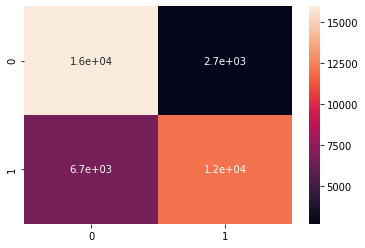

In [41]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
sns.heatmap(confusion_matrix(y_test, predictions), annot= True)
print("Classification Report")
print(classification_report(y_test, predictions))